# Imports

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import os

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Obtenir les donnees

On considere le jeu de donnees `spotify-extr` qui contient l'information de 10,000 chansons tirees de l'API de Spotify Web. Les donnees contiennent 15 variables explicatives : 12 quantitatives, 2 qualitatives et une variable binaire.
<br>
Ces variables explicatives sont :
* `valence` : la positivite de la chanson
* `year` : annee de sortie
* `acousticness` : mesure d'une chanson etant acoustique
* `danceability` : mesure la dancabilite d'une chanson
* `duration` : duree d'une chanson en millisecondes
* `energy` : l'energie de la chanson
* `intrumentalness` : taux d'instrumentalisation
* `key` : cle musicale
* `liveness` : taux de prestation en live
* `loudness` : intensite sonore de la chanson
* `mode` : variable binaire qui indique si la chanson commence par une progression d'accords majeure (1) ou non (0)
* `speechiness` : taux de vocaux dans la chanson
* `tempo` : cadence de la chanson en beats par minute

Ce projet consiste a predire la valeur de `pop.class`, c'est-a-dire la popularite d'une chanson.

In [2]:
data = pd.read_csv("data/spotify-extr.txt", sep=" ")
data.head()

,valence,year,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,pop.class
161704,0.647,1975,0.4490,0.376,298840,0.827,0.007880,B,0.466,-7.604,1,25,0.3990,170.475,C
168077,0.150,2008,0.8990,0.508,236800,0.169,0.000011,Ab,0.136,-11.332,1,42,0.0553,107.477,B
35922,0.423,2007,0.0185,0.470,301093,0.878,0.083900,B,0.276,-5.576,0,65,0.0377,150.093,A
135823,0.302,1995,0.0384,0.176,142200,0.980,0.552000,B,0.237,-3.154,1,36,0.0721,172.566,C
165395,0.828,1994,0.5310,0.705,187800,0.625,0.000008,G,0.348,-11.963,0,38,0.0639,97.831,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 161704 to 90217
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           10000 non-null  float64
 1   year              10000 non-null  int64  
 2   acousticness      10000 non-null  float64
 3   danceability      10000 non-null  float64
 4   duration          10000 non-null  int64  
 5   energy            10000 non-null  float64
 6   instrumentalness  10000 non-null  float64
 7   key               10000 non-null  object 
 8   liveness          10000 non-null  float64
 9   loudness          10000 non-null  float64
 10  mode              10000 non-null  int64  
 11  popularity        10000 non-null  int64  
 12  speechiness       10000 non-null  float64
 13  tempo             10000 non-null  float64
 14  pop.class         10000 non-null  object 
dtypes: float64(9), int64(4), object(2)
memory usage: 1.2+ MB


In [4]:
# Check for missing values
data.isnull().sum()

valence             0
year                0
acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
pop.class           0
dtype: int64

In [5]:
data["pop.class"].value_counts()

D    3183
C    2968
B    2886
A     963
Name: pop.class, dtype: int64

In [6]:
data["key"].value_counts()

C     1282
G     1188
D     1092
A     1050
F      961
Db     769
Bb     746
E      743
Ab     637
B      603
Gb     494
Eb     435
Name: key, dtype: int64

In [7]:
data["mode"].value_counts()

1    7147
0    2853
Name: mode, dtype: int64

In [8]:
data.describe()

,valence,year,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.532815,1977.026200,0.495719,0.540029,2.272151e+05,0.487500,0.164947,0.204063,-11.437683,0.71470,31.558100,0.101815,116.865750
std,0.262431,26.000068,0.377681,0.176193,1.124568e+05,0.267729,0.313327,0.173221,5.787993,0.45158,21.915904,0.168111,30.969039
min,0.000000,1921.000000,0.000000,0.000000,5.991000e+03,0.000000,0.000000,0.000000,-60.000000,0.00000,0.000000,0.000000,0.000000
25%,0.324000,1956.000000,0.092675,0.417000,1.690670e+05,0.262000,0.000000,0.097800,-14.557000,0.00000,11.000000,0.035000,93.564500
50%,0.543000,1978.000000,0.504000,0.550000,2.065295e+05,0.476000,0.000174,0.135000,-10.552500,1.00000,33.000000,0.045400,114.437500
75%,0.751000,1999.000000,0.889250,0.671000,2.597330e+05,0.708000,0.087100,0.256000,-7.115500,1.00000,48.250000,0.078600,135.470000
max,0.993000,2020.000000,0.996000,0.988000,2.703227e+06,1.000000,1.000000,0.991000,1.342000,1.00000,93.000000,0.969000,214.419000


In [9]:
data["key"] = pd.Categorical(data["key"], ordered=False)
data["pop.class"] = pd.Categorical(data["pop.class"])
data.dtypes

valence              float64
year                   int64
acousticness         float64
danceability         float64
duration               int64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
mode                   int64
popularity             int64
speechiness          float64
tempo                float64
pop.class           category
dtype: object

# Visualize the data

Saving figure attribute_histogram_plots


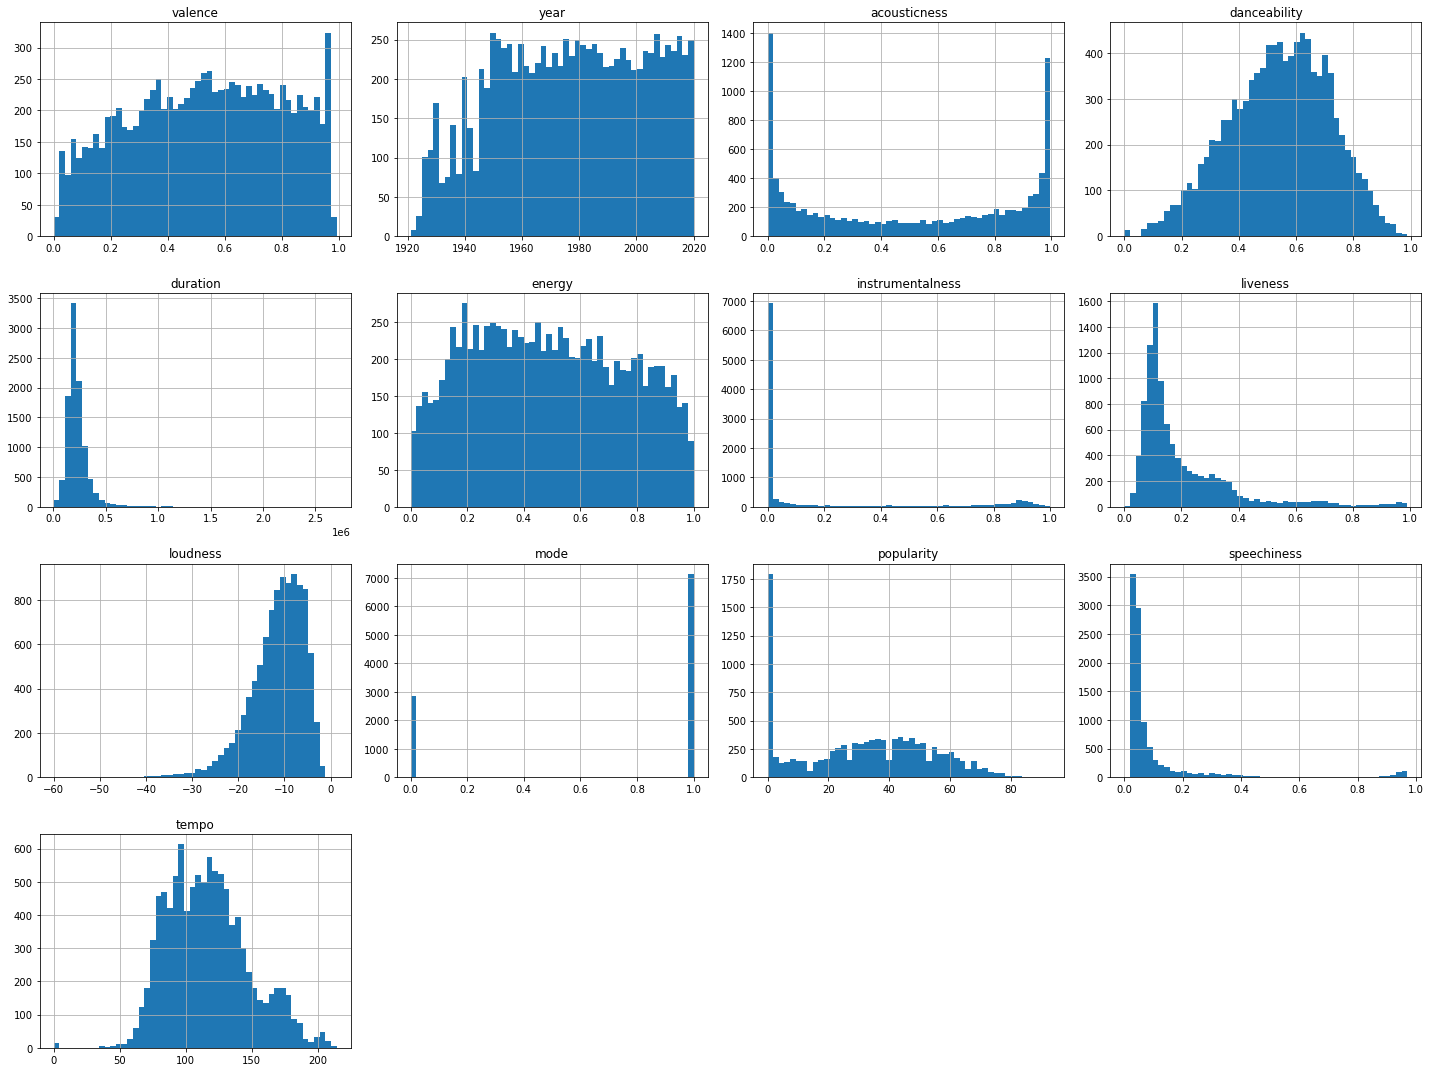

In [10]:
%matplotlib inline
data.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histogram_plots")
plt.show()

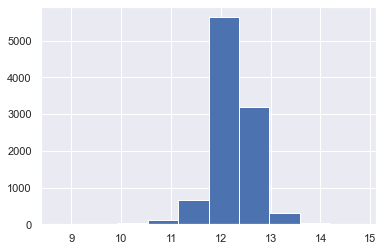

In [32]:
data["log_duration"] = np.log(data["duration"])
data["log_duration"].hist()
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data["danceability"])
print(scaler.transform(data["danceability"]))

ValueError: Expected 2D array, got 1D array instead:
array=[0.376 0.508 0.47  ... 0.484 0.287 0.619].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

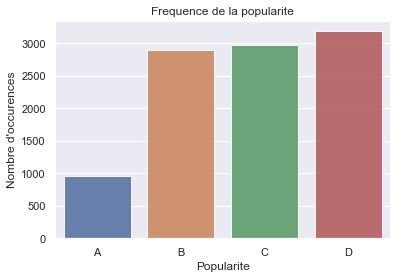

In [11]:
# data["pop.class"].hist()
pop_class_count = data["pop.class"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=pop_class_count.index, y=pop_class_count.values, alpha=0.9)
plt.title('Frequence de la popularite')
plt.ylabel('Nombre d\'occurences')
plt.xlabel('Popularite')
plt.show()

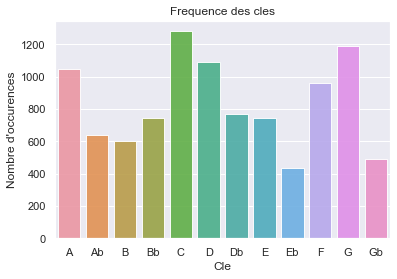

In [12]:
# data["key"].hist()
key_count = data["key"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=key_count.index, y=key_count.values, alpha=0.9)
plt.title('Frequence des cles')
plt.ylabel('Nombre d\'occurences')
plt.xlabel('Cle')
plt.show()

In [13]:
corr_matrix = data.corr()

Saving figure correlation_square_matrix


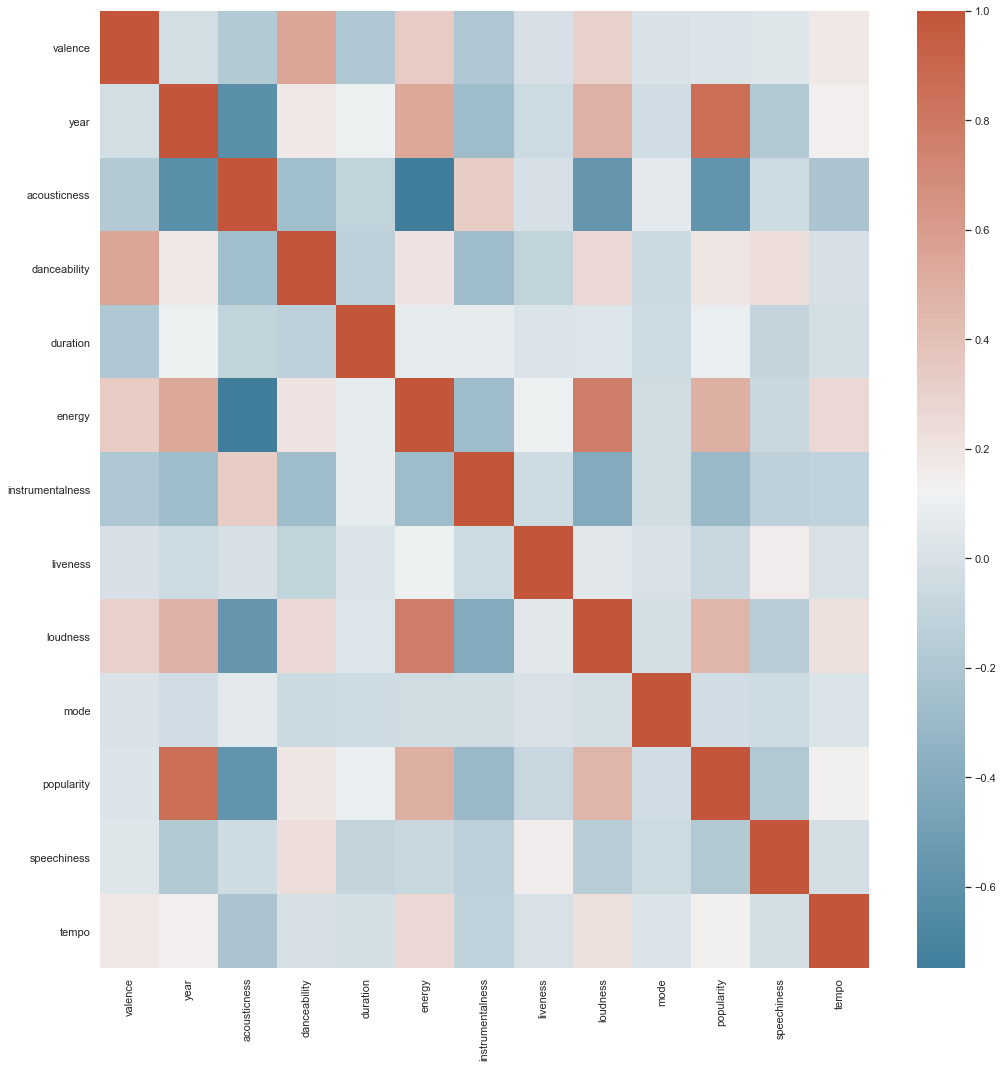

In [14]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap=cmap)
save_fig('correlation_square_matrix')
plt.show()

In [15]:
# corr_matrix["popularity"].sort_values()

Saving figure scatter_matrix_plot


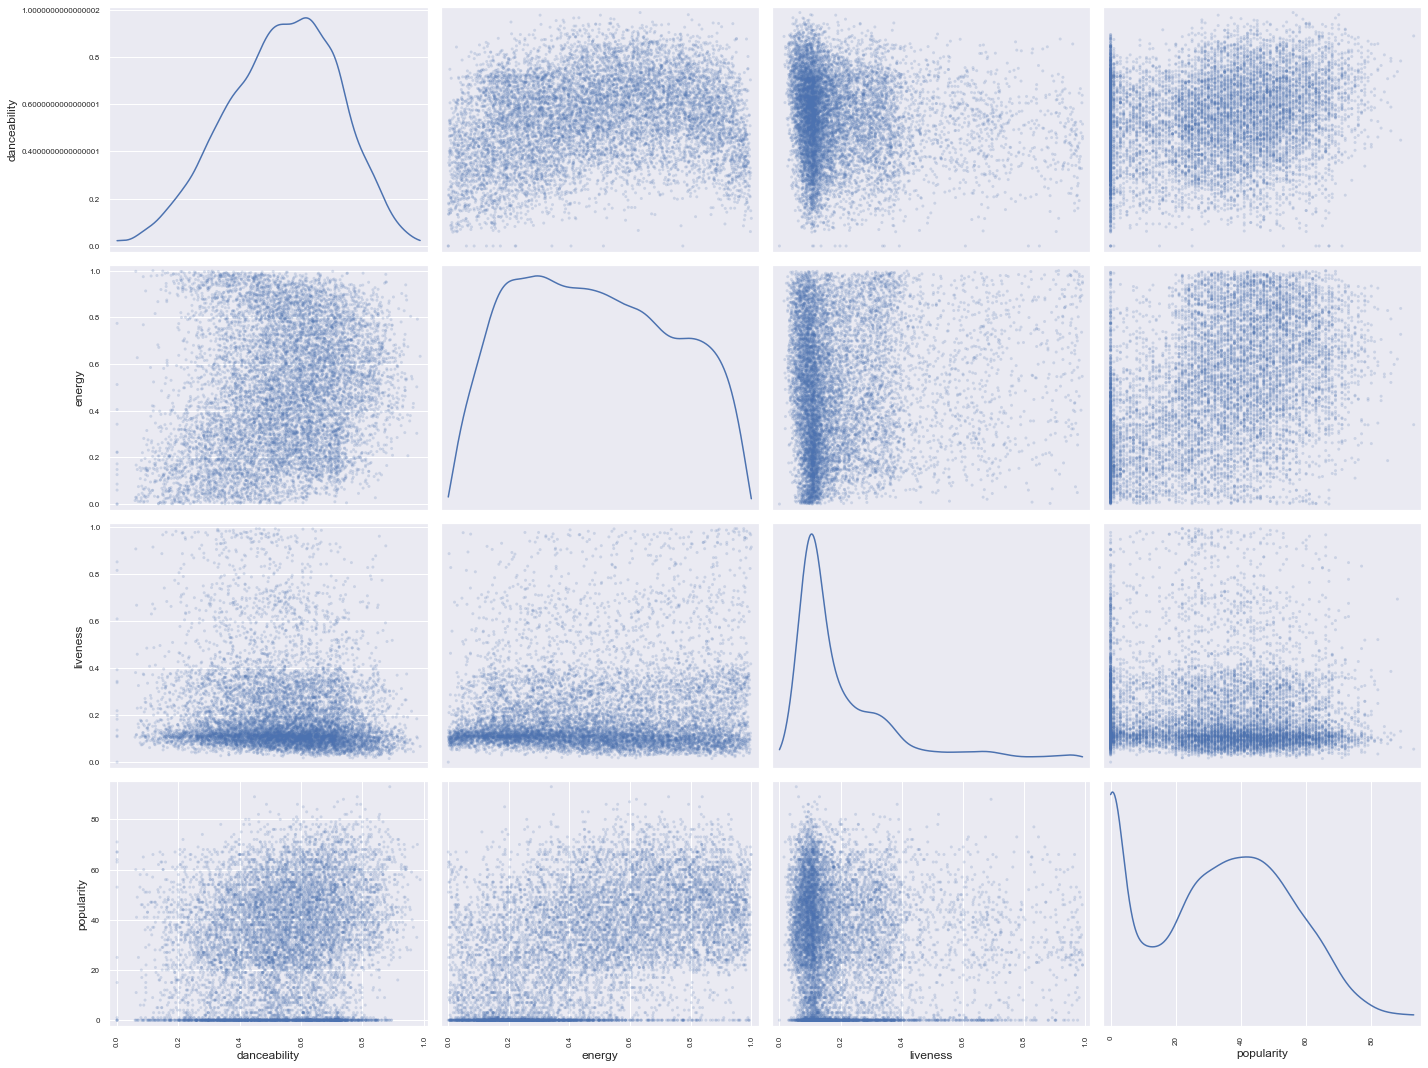

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["danceability", "energy", "liveness", "popularity"]
scatter_matrix(data[attributes], alpha=0.2, figsize=(20, 15), diagonal='kde')
save_fig("scatter_matrix_plot")
plt.show()

In [17]:
data_cat = data[["pop.class"]]
data_cat.head()

,pop.class
161704,C
168077,B
35922,A
135823,C
165395,C


In [18]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:10]

array([[2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.]])

In [19]:
ordinal_encoder.categories_

[array(['A', 'B', 'C', 'D'], dtype=object)]

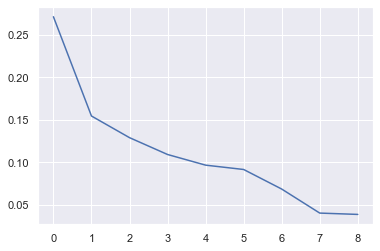

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

attributs = ["valence", "acousticness", "danceability", 
             "duration", "instrumentalness", "liveness", 
             "loudness", "speechiness", "tempo"]
X = scale(data[attributs])

pca = PCA()
C = pca.fit_transform(X)
plt.plot(pca.explained_variance_ratio_)
plt.show()

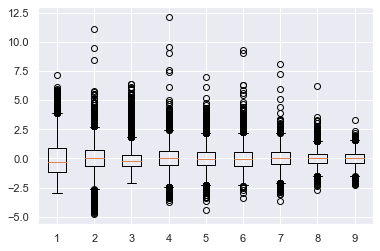

In [21]:
plt.boxplot(C)
plt.show()

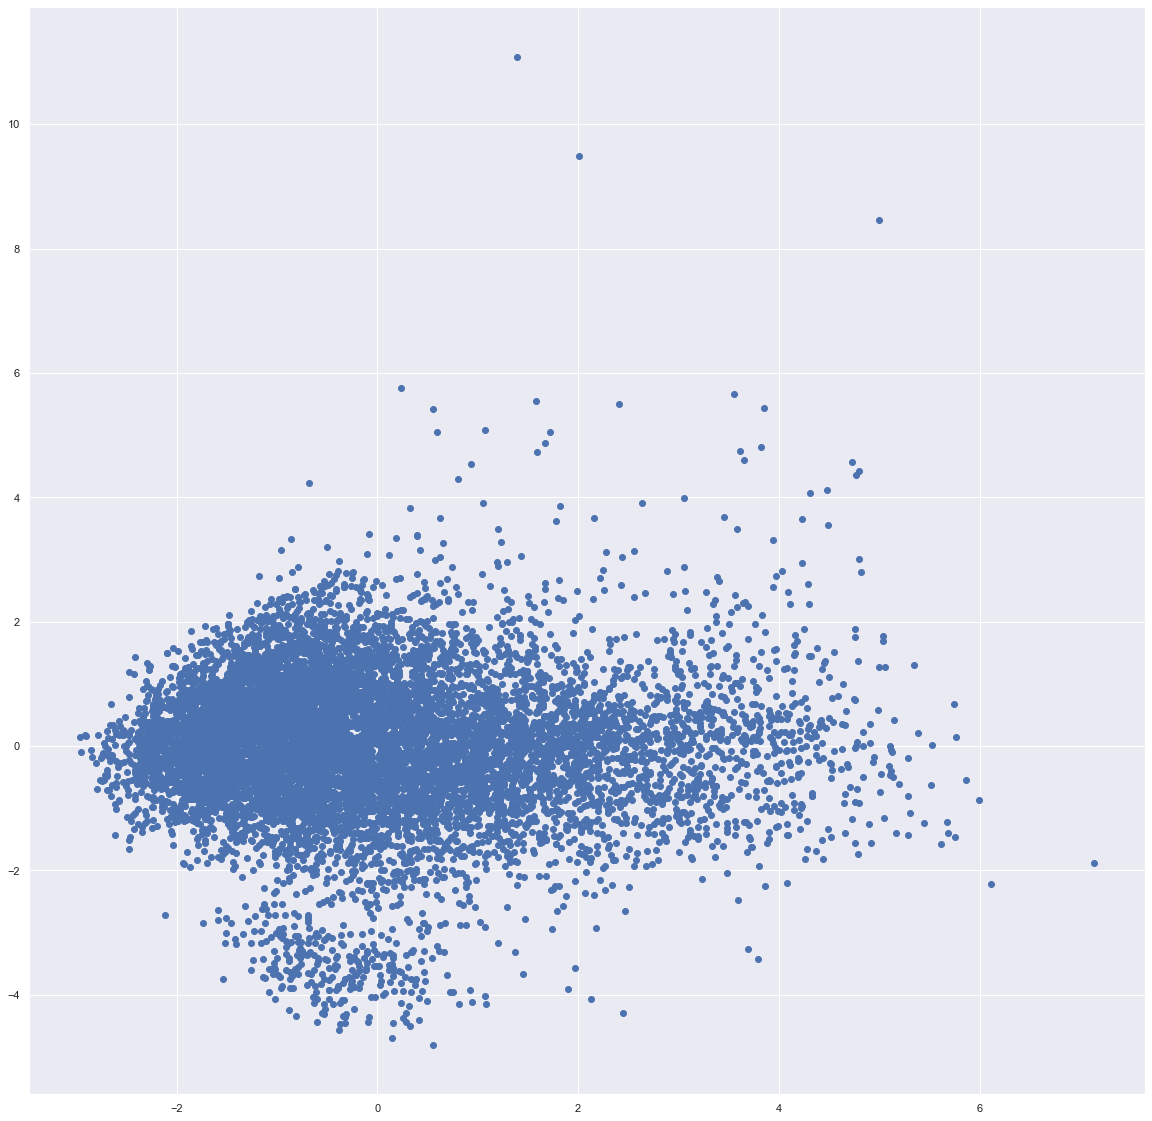

In [22]:
plt.figure(figsize=(20,20))
plt.scatter(C[:,0], C[:,1])
plt.show()

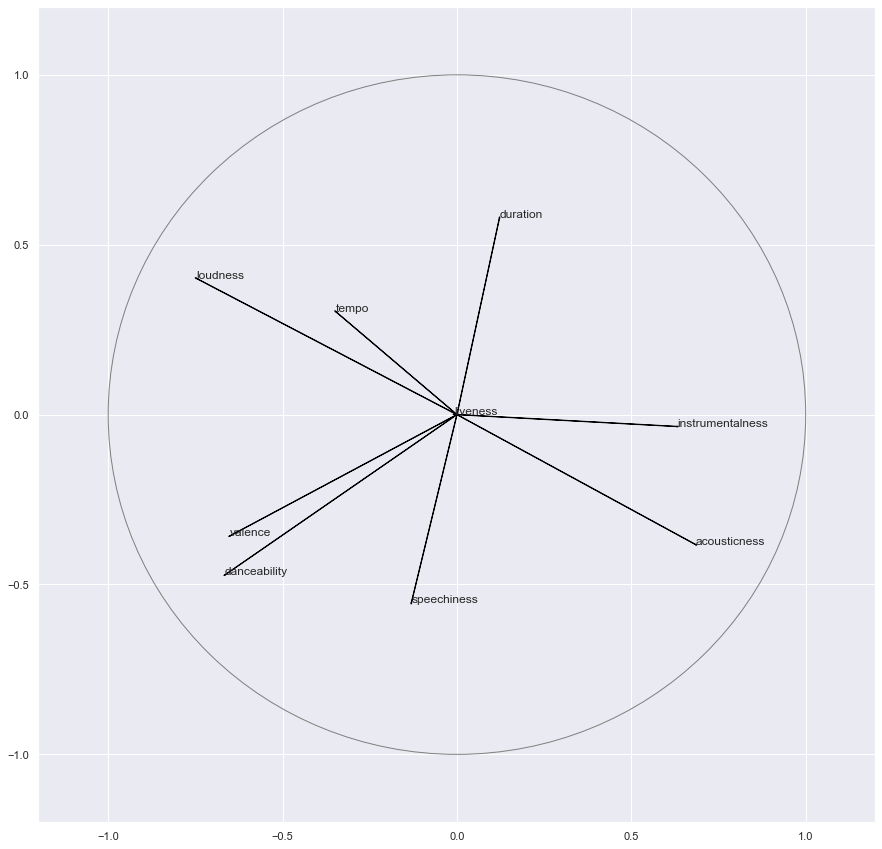

In [23]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data[attributs].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))

# cercle
c = plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

# Prepare the data

In [24]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)
test_set.head()

,valence,year,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,pop.class
111567,0.962,1953,0.9520,0.727,156526,0.388,0.000734,F,0.1290,-14.233,0,0,0.0511,153.059,D
76508,0.816,1936,0.9650,0.578,162507,0.392,0.252000,Gb,0.2600,-5.864,0,0,0.0458,120.040,D
133077,0.888,1981,0.6700,0.877,280216,0.219,0.000000,E,0.1310,-14.138,0,31,0.1350,124.101,C
131312,0.565,1972,0.2600,0.414,260813,0.708,0.000000,D,0.3990,-8.831,1,42,0.2620,124.475,B
16844,0.592,2006,0.0247,0.661,204960,0.978,0.000000,Db,0.0856,-3.064,0,68,0.1070,98.019,A
